In [1]:
#Import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
AAPL = pd.read_csv("./Database/Pre_Processed_AAPL.csv")

In [3]:
AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,1/4/2010,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,1/5/2010,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,1/6/2010,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,1/7/2010,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,1/8/2010,7.510714,7.571429,7.466429,7.570714,6.409364,447610800


In [4]:
#Read data from csv file
df = pd.read_csv("./Database/Pre_Processed_AAPL.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj. Close,Volume
0,1/4/2010,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,1/5/2010,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,1/6/2010,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,1/7/2010,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,1/8/2010,7.510714,7.571429,7.466429,7.570714,6.409364,447610800
5,1/11/2010,7.600000,7.607143,7.444643,7.503929,6.352823,462229600
6,1/12/2010,7.471071,7.491786,7.372143,7.418571,6.280558,594459600
7,1/13/2010,7.423929,7.533214,7.289286,7.523214,6.369148,605892000
8,1/14/2010,7.503929,7.516429,7.465000,7.479643,6.332262,432894000
9,1/15/2010,7.533214,7.557143,7.352500,7.354643,6.226438,594067600


In [5]:
#Drop no-meaning fields
df = df.drop(columns=['Date','Adj. Close'])
df.head(10)

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
5,7.600000,7.607143,7.444643,7.503929,462229600
6,7.471071,7.491786,7.372143,7.418571,594459600
7,7.423929,7.533214,7.289286,7.523214,605892000
8,7.503929,7.516429,7.465000,7.479643,432894000
9,7.533214,7.557143,7.352500,7.354643,594067600


In [6]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2762,131.610001,134.410004,129.649994,131.880005,168904800
2763,132.160004,132.429993,130.779999,130.960007,88223700
2764,131.320007,133.460007,131.100006,131.970001,54930100
2765,133.990005,137.339996,133.509995,136.690002,124486200


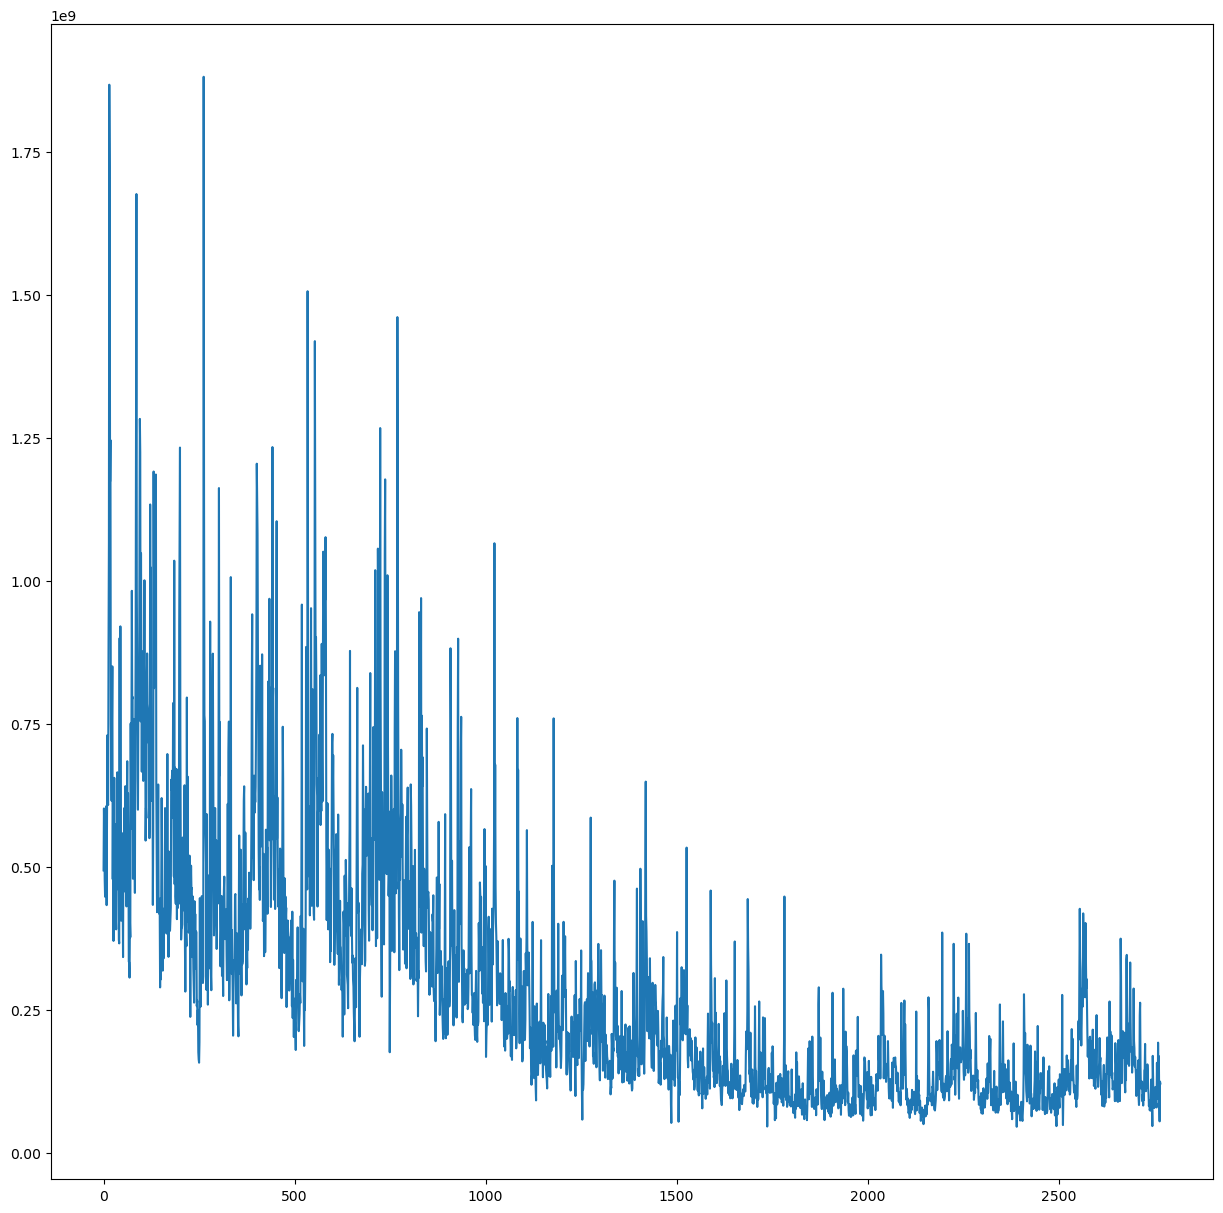

In [7]:
#Visualize volume
plt.figure(figsize=(15,15))
plt.plot(df['Volume'][0:5000])

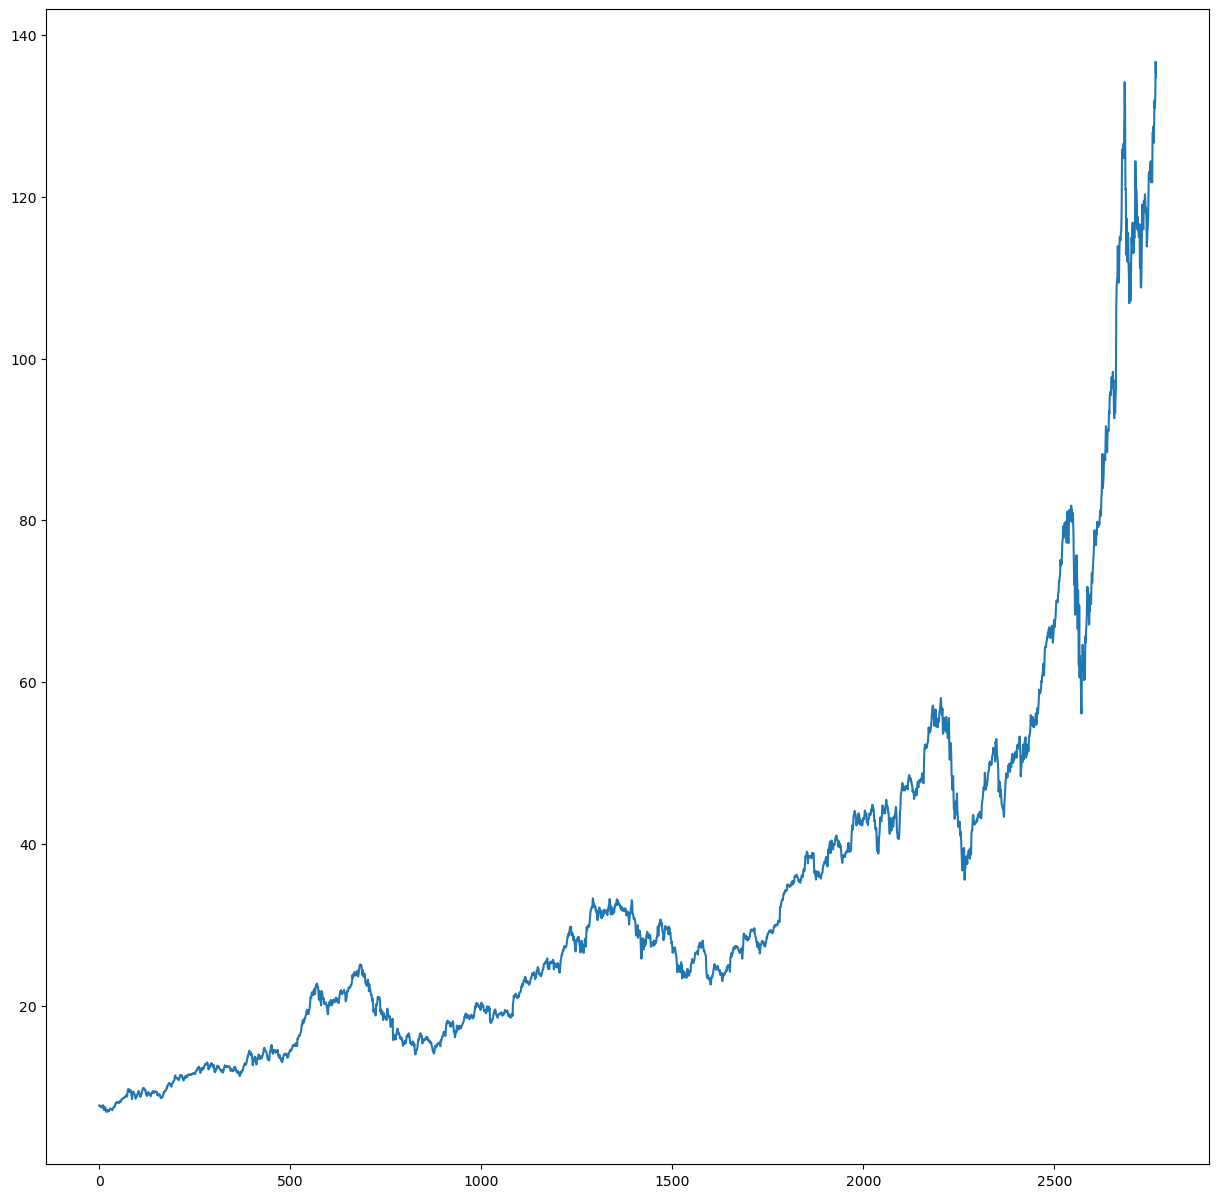

In [8]:
#Visualize close
plt.figure(figsize=(15,15))
plt.plot(df['Close'])

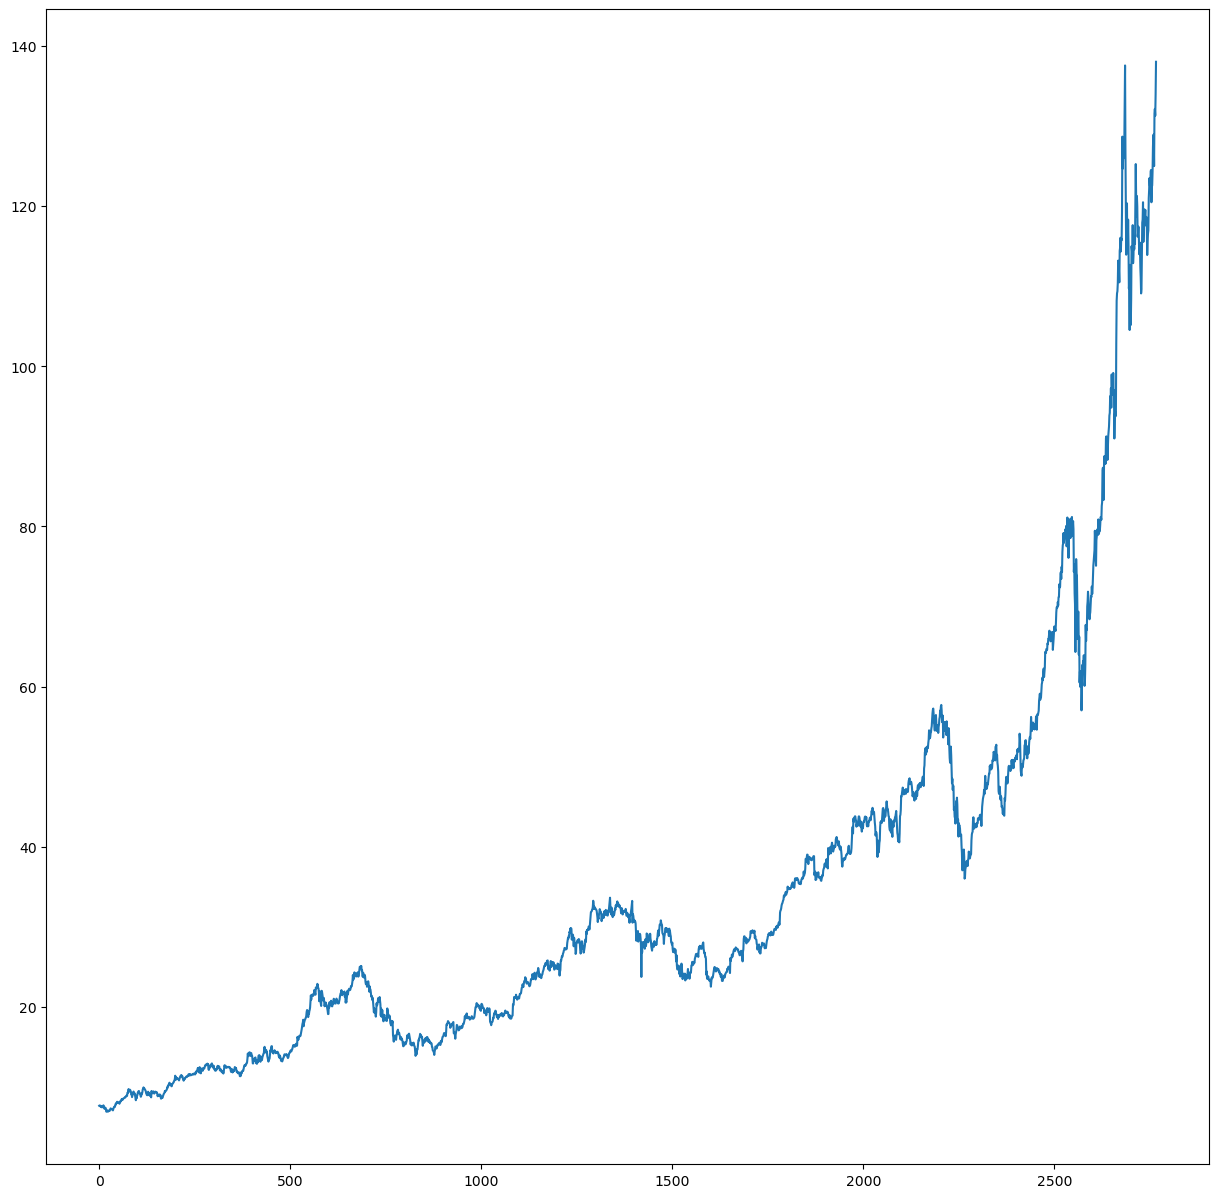

In [9]:
#Visualize Open
plt.figure(figsize=(15,15))
plt.plot(df['Open'])

In [10]:
#Shape of Close data
X_c = df['Close']
print(X_c.shape)

(2767,)


In [11]:
#Scaler to normalization
scaler = MinMaxScaler(feature_range=(0, 1))

def getPastSequenceData(df,timestep):
    X=[]
    y=[]
    p = scaler.fit_transform(np.array(df['Close']).reshape(-1,1)) 
    for i in range(1,len(df)-timestep,timestep):
        vals=np.array(p[i-1:i+timestep-1])
        temp=vals
        X.append(temp)
        y.append(p[i+timestep-1])
    return X,y

In [12]:
#Time step to extract features
#thay đổi time_step để thay đổi miền dự đoán
#Ex: time_step = 10
time_step = 7

#Get features
X,Y=getPastSequenceData(df,time_step)
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
Y=np.array(Y)

In [13]:
print("After getting features:")
print(X.shape) #features
print(Y.shape) #labels
print(len(X)) #395/7  #length

After getting features:
(395, 7, 1)
(395, 1)
395


In [14]:
#Spliting data
ntrain = int(len(X)*0.8)

#Train 80% - Test 20%
X_train, X_test = X[0:ntrain], X[ntrain:len(X)]
Y_train, Y_test = Y[0:ntrain], Y[ntrain:len(X)]

#After splitting
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(316, 7, 1) (79, 7, 1)
(316, 1) (79, 1)


In [15]:
for data in X_train:
  print(data)

[[0.00604081]
 [0.00614259]
 [0.00520456]
 [0.00509727]
 [0.00548239]
 [0.00496799]
 [0.00431054]]
[[0.00511653]
 [0.00478093]
 [0.00381814]
 [0.00632415]
 [0.00541363]
 [0.00440682]
 [0.00156797]]
[[3.03140758e-03]
 [3.82089472e-03]
 [4.35455641e-03]
 [1.99159311e-03]
 [2.74721599e-06]
 [7.37216551e-04]
 [1.04805980e-03]]
[[0.00197509]
 [0.        ]
 [0.00093802]
 [0.00056942]
 [0.00113884]
 [0.0008445 ]
 [0.00182104]]
[[0.00229144]
 [0.00312219]
 [0.00288837]
 [0.0029929 ]
 [0.00264629]
 [0.00230244]
 [0.00137816]]
[[0.00236846]
 [0.00273707]
 [0.00345778]
 [0.0046599 ]
 [0.00462139]
 [0.00475342]
 [0.00513304]]
[[0.00739972]
 [0.00743548]
 [0.00851931]
 [0.00901996]
 [0.00920151]
 [0.00950411]
 [0.00874488]]
[[0.00891268]
 [0.0088219 ]
 [0.00896769]
 [0.00830749]
 [0.0089952 ]
 [0.00998825]
 [0.01026608]]
[[0.00951786]
 [0.01068697]
 [0.01109683]
 [0.01204862]
 [0.01181479]
 [0.01208163]
 [0.01277484]]
[[0.01306368]
 [0.01335526]
 [0.01317646]
 [0.01368261]
 [0.01382015]
 [0.0138586

In [16]:
for data in X_test:
  print(data)

[[0.37493774]
 [0.3730892 ]
 [0.36313396]
 [0.3694691 ]
 [0.37204937]
 [0.37605458]
 [0.36134316]]
[[0.37041265]
 [0.36367312]
 [0.35585527]
 [0.35789638]
 [0.3686026 ]
 [0.37507255]
 [0.3466895 ]]
[[0.33534784]
 [0.33954562]
 [0.35144568]
 [0.34863435]
 [0.34089352]
 [0.32106005]
 [0.31732442]]
[[0.30686854]
 [0.31574546]
 [0.31982768]
 [0.30505849]
 [0.28795934]
 [0.28757423]
 [0.27892837]]
[[0.28341497]
 [0.28268327]
 [0.29558464]
 [0.29290809]
 [0.29104028]
 [0.3030559 ]
 [0.28740093]]
[[0.28360754]
 [0.27161119]
 [0.27374858]
 [0.27188077]
 [0.27278579]
 [0.2763481 ]
 [0.26581518]]
[[0.2628498 ]
 [0.26695129]
 [0.25697678]
 [0.24915893]
 [0.23741289]
 [0.22990314]
 [0.24981362]]
[[0.24784952]
 [0.24800357]
 [0.25091121]
 [0.2512578 ]
 [0.22096845]
 [0.2326567 ]
 [0.23202126]]
[[0.23745141]
 [0.24238088]
 [0.24332443]
 [0.24041678]
 [0.23600722]
 [0.24191876]
 [0.24551959]]
[[0.24729112]
 [0.24913968]
 [0.24236164]
 [0.24355549]
 [0.24120628]
 [0.2509497 ]
 [0.24813838]]
[[0.245018

In [17]:
import tensorflow as tf

In [18]:
from keras.layers import Conv1D, Activation,MaxPooling1D,Flatten, GRU, AveragePooling1D, Dense, Dropout
from keras.models import Sequential

#Input các vecto 7X1
# 32*
#Build model
model=Sequential()
#Layer1 
model.add(Conv1D(32, 3, padding='same', input_shape=(time_step,1)))
model.add(Activation('relu'))

#Layer2
model.add(Conv1D(32, 3, padding='same'))
model.add(Activation('relu'))

#layer3 
model.add(AveragePooling1D(pool_size=2))

#layer4
model.add(Conv1D(64, 3, padding='same', input_shape=(time_step,1)))
model.add(Activation('relu'))

#layer5
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))

#layer6
model.add(AveragePooling1D())

#Flatten
model.add(Flatten())
#Output
model.add(Dense(1))

#Summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 32)             128       
                                                                 
 activation (Activation)     (None, 7, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             3104      
                                                                 
 activation_1 (Activation)   (None, 7, 32)             0         
                                                                 
 average_pooling1d (AverageP  (None, 3, 32)            0         
 ooling1D)                                                       
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 64)             6208      
                                                        

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Call back to save best model
monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="Mystockpred.hdf5", verbose=0, save_best_only=True)

In [20]:
import tensorflow as tf

#Training model - metric MSE
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,Y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 512)

Epoch 1/512
2/2 [==============================] - 1s 297ms/step - loss: 0.0072 - val_loss: 0.0231
Epoch 2/512
2/2 [==============================] - 0s 54ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 3/512
2/2 [==============================] - 0s 57ms/step - loss: 0.0010 - val_loss: 3.4605e-04
Epoch 4/512
2/2 [==============================] - 0s 34ms/step - loss: 0.0020 - val_loss: 4.9575e-04
Epoch 5/512
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 6/512
2/2 [==============================] - 0s 52ms/step - loss: 5.3646e-04 - val_loss: 0.0068
Epoch 7/512
2/2 [==============================] - 0s 31ms/step - loss: 6.7196e-04 - val_loss: 0.0093
Epoch 8/512
2/2 [==============================] - 0s 31ms/step - loss: 8.9393e-04 - val_loss: 0.0084
Epoch 9/512
2/2 [==============================] - 0s 35ms/step - loss: 7.2583e-04 - val_loss: 0.0054
Epoch 10/512
2/2 [==============================] - 0s 31ms/step - loss: 3.9221e-04 - val_los

2/2 [==============================] - 0s 29ms/step - loss: 2.4063e-05 - val_loss: 9.5179e-05
Epoch 79/512
2/2 [==============================] - 0s 30ms/step - loss: 2.3948e-05 - val_loss: 1.0093e-04
Epoch 80/512
2/2 [==============================] - 0s 30ms/step - loss: 2.3882e-05 - val_loss: 1.0126e-04
Epoch 81/512
2/2 [==============================] - 0s 29ms/step - loss: 2.3871e-05 - val_loss: 9.9737e-05
Epoch 82/512
2/2 [==============================] - 0s 31ms/step - loss: 2.3932e-05 - val_loss: 1.0109e-04
Epoch 83/512
2/2 [==============================] - 0s 31ms/step - loss: 2.3832e-05 - val_loss: 9.6325e-05
Epoch 84/512
2/2 [==============================] - 0s 29ms/step - loss: 2.3837e-05 - val_loss: 9.7277e-05
Epoch 85/512
2/2 [==============================] - 0s 31ms/step - loss: 2.4123e-05 - val_loss: 1.0511e-04
Epoch 86/512
2/2 [==============================] - 0s 30ms/step - loss: 2.3902e-05 - val_loss: 1.0048e-04
Epoch 87/512
2/2 [==============================] 

2/2 [==============================] - 0s 29ms/step - loss: 2.3007e-05 - val_loss: 9.8070e-05
Epoch 155/512
2/2 [==============================] - 0s 29ms/step - loss: 2.2986e-05 - val_loss: 8.1988e-05
Epoch 156/512
2/2 [==============================] - 0s 29ms/step - loss: 2.2863e-05 - val_loss: 8.3072e-05
Epoch 157/512
2/2 [==============================] - 0s 28ms/step - loss: 2.2775e-05 - val_loss: 9.1592e-05
Epoch 158/512
2/2 [==============================] - 0s 29ms/step - loss: 2.3011e-05 - val_loss: 9.5742e-05
Epoch 159/512
2/2 [==============================] - 0s 30ms/step - loss: 2.2890e-05 - val_loss: 8.1499e-05
Epoch 160/512
2/2 [==============================] - 0s 29ms/step - loss: 2.2873e-05 - val_loss: 8.6669e-05
Epoch 161/512
2/2 [==============================] - 0s 33ms/step - loss: 2.2798e-05 - val_loss: 9.5720e-05
Epoch 162/512
2/2 [==============================] - 0s 30ms/step - loss: 2.2798e-05 - val_loss: 8.6534e-05
Epoch 163/512
2/2 [=======================

Epoch 230/512
2/2 [==============================] - 0s 29ms/step - loss: 2.2234e-05 - val_loss: 8.0802e-05
Epoch 231/512
2/2 [==============================] - 0s 29ms/step - loss: 2.1447e-05 - val_loss: 9.4770e-05
Epoch 232/512
2/2 [==============================] - 0s 29ms/step - loss: 2.1895e-05 - val_loss: 7.8586e-05
Epoch 233/512
2/2 [==============================] - 0s 30ms/step - loss: 2.1760e-05 - val_loss: 7.3290e-05
Epoch 234/512
2/2 [==============================] - 0s 30ms/step - loss: 2.1520e-05 - val_loss: 8.9346e-05
Epoch 235/512
2/2 [==============================] - 0s 31ms/step - loss: 2.2110e-05 - val_loss: 8.4392e-05
Epoch 236/512
2/2 [==============================] - 0s 27ms/step - loss: 2.2058e-05 - val_loss: 6.6467e-05
Epoch 237/512
2/2 [==============================] - 0s 63ms/step - loss: 2.1988e-05 - val_loss: 9.2150e-05
Epoch 238/512
2/2 [==============================] - 0s 29ms/step - loss: 2.1801e-05 - val_loss: 8.2136e-05
Epoch 239/512
2/2 [=========

Epoch 306/512
2/2 [==============================] - 0s 28ms/step - loss: 2.0207e-05 - val_loss: 8.3011e-05
Epoch 307/512
2/2 [==============================] - 0s 30ms/step - loss: 2.0170e-05 - val_loss: 6.6822e-05
Epoch 308/512
2/2 [==============================] - 0s 28ms/step - loss: 2.0133e-05 - val_loss: 7.7830e-05
Epoch 309/512
2/2 [==============================] - 0s 30ms/step - loss: 2.0088e-05 - val_loss: 7.7834e-05
Epoch 310/512
2/2 [==============================] - 0s 30ms/step - loss: 1.9991e-05 - val_loss: 7.2665e-05
Epoch 311/512
2/2 [==============================] - 0s 30ms/step - loss: 1.9938e-05 - val_loss: 7.0614e-05
Epoch 312/512
2/2 [==============================] - 0s 31ms/step - loss: 2.0379e-05 - val_loss: 7.2943e-05
Epoch 313/512
2/2 [==============================] - 0s 29ms/step - loss: 2.0203e-05 - val_loss: 6.9944e-05
Epoch 314/512
2/2 [==============================] - 0s 30ms/step - loss: 1.9903e-05 - val_loss: 8.5556e-05
Epoch 315/512
2/2 [=========

Epoch 382/512
2/2 [==============================] - 0s 30ms/step - loss: 1.8708e-05 - val_loss: 1.0306e-04
Epoch 383/512
2/2 [==============================] - 0s 33ms/step - loss: 2.0062e-05 - val_loss: 5.2368e-05
Epoch 384/512
2/2 [==============================] - 0s 31ms/step - loss: 1.8640e-05 - val_loss: 9.1114e-05
Epoch 385/512
2/2 [==============================] - 0s 29ms/step - loss: 1.9160e-05 - val_loss: 5.8346e-05
Epoch 386/512
2/2 [==============================] - 0s 28ms/step - loss: 1.9009e-05 - val_loss: 6.4887e-05
Epoch 387/512
2/2 [==============================] - 0s 43ms/step - loss: 1.8640e-05 - val_loss: 7.9912e-05
Epoch 388/512
2/2 [==============================] - 0s 55ms/step - loss: 1.7928e-05 - val_loss: 4.9826e-05
Epoch 389/512
2/2 [==============================] - 0s 30ms/step - loss: 1.9445e-05 - val_loss: 7.6706e-05
Epoch 390/512
2/2 [==============================] - 0s 30ms/step - loss: 1.8370e-05 - val_loss: 6.2745e-05
Epoch 391/512
2/2 [=========

Epoch 458/512
2/2 [==============================] - 0s 34ms/step - loss: 1.7008e-05 - val_loss: 5.5803e-05
Epoch 459/512
2/2 [==============================] - 0s 30ms/step - loss: 1.8366e-05 - val_loss: 5.8928e-05
Epoch 460/512
2/2 [==============================] - 0s 30ms/step - loss: 1.6339e-05 - val_loss: 7.3693e-05
Epoch 461/512
2/2 [==============================] - 0s 30ms/step - loss: 1.6459e-05 - val_loss: 4.5153e-05
Epoch 462/512
2/2 [==============================] - 0s 30ms/step - loss: 1.6159e-05 - val_loss: 8.5035e-05
Epoch 463/512
2/2 [==============================] - 0s 29ms/step - loss: 1.6003e-05 - val_loss: 4.2623e-05
Epoch 464/512
2/2 [==============================] - 0s 29ms/step - loss: 1.6667e-05 - val_loss: 7.8150e-05
Epoch 465/512
2/2 [==============================] - 0s 30ms/step - loss: 1.6015e-05 - val_loss: 4.5779e-05
Epoch 466/512
2/2 [==============================] - 0s 31ms/step - loss: 1.6040e-05 - val_loss: 6.8994e-05
Epoch 467/512
2/2 [=========

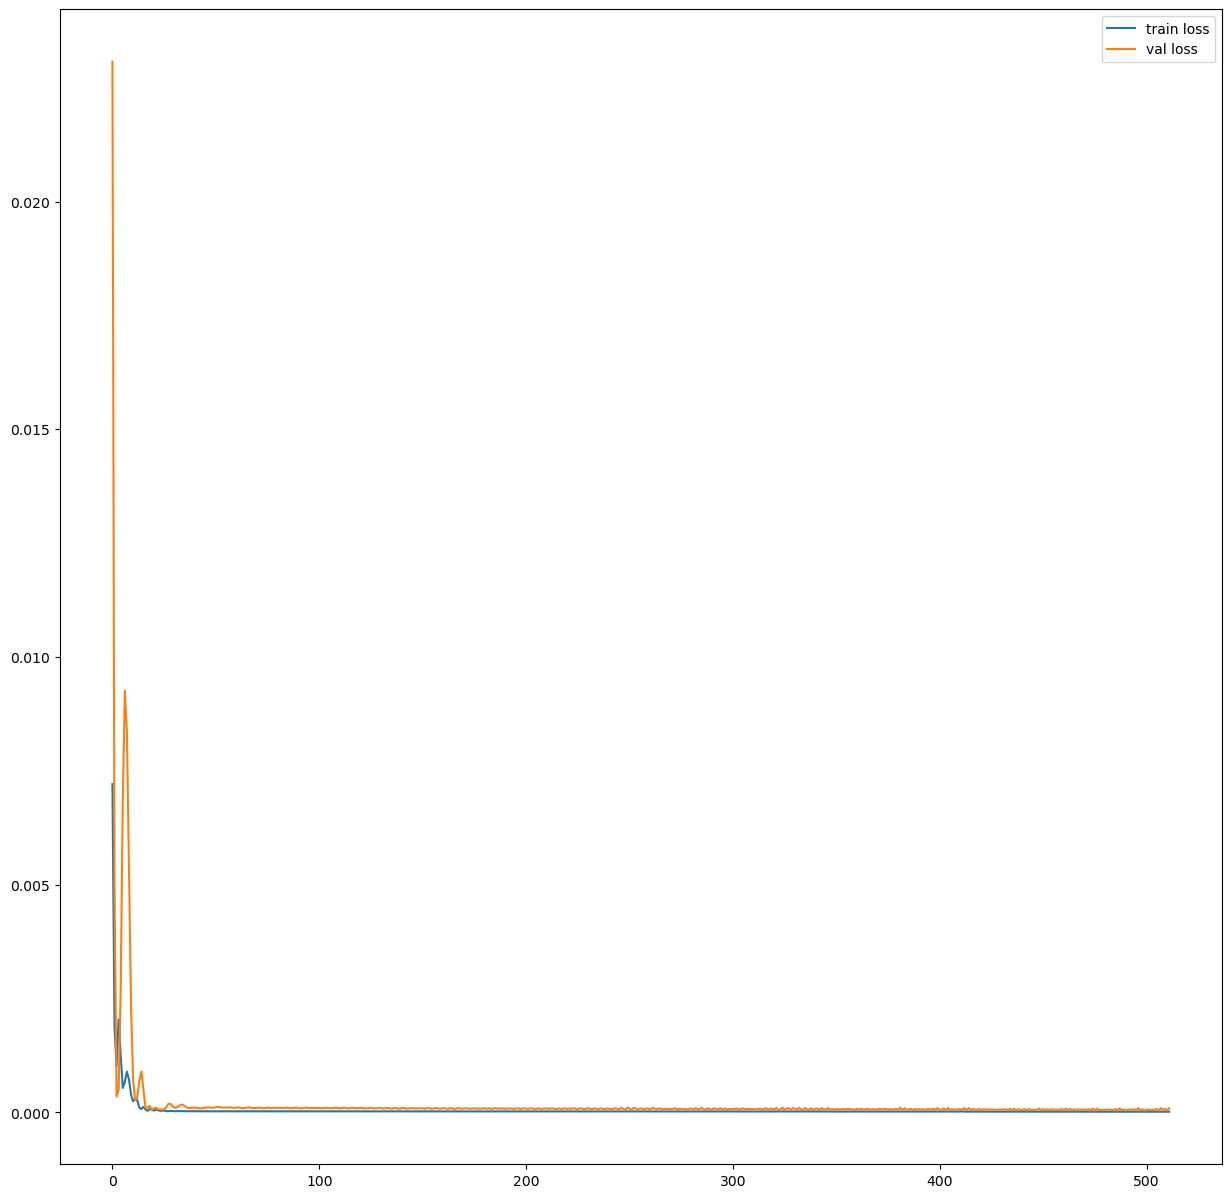

In [21]:
#Draw chart of train and valid loss
plt.figure(figsize=(15,15))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [22]:
import math
from sklearn.metrics import mean_squared_error

#make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test) #20%

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(Y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(Y_test)

3/3 [==============================] - 0s 9ms/step


Average Training Difference: 0.52 
Average Testing Difference: 3.20 


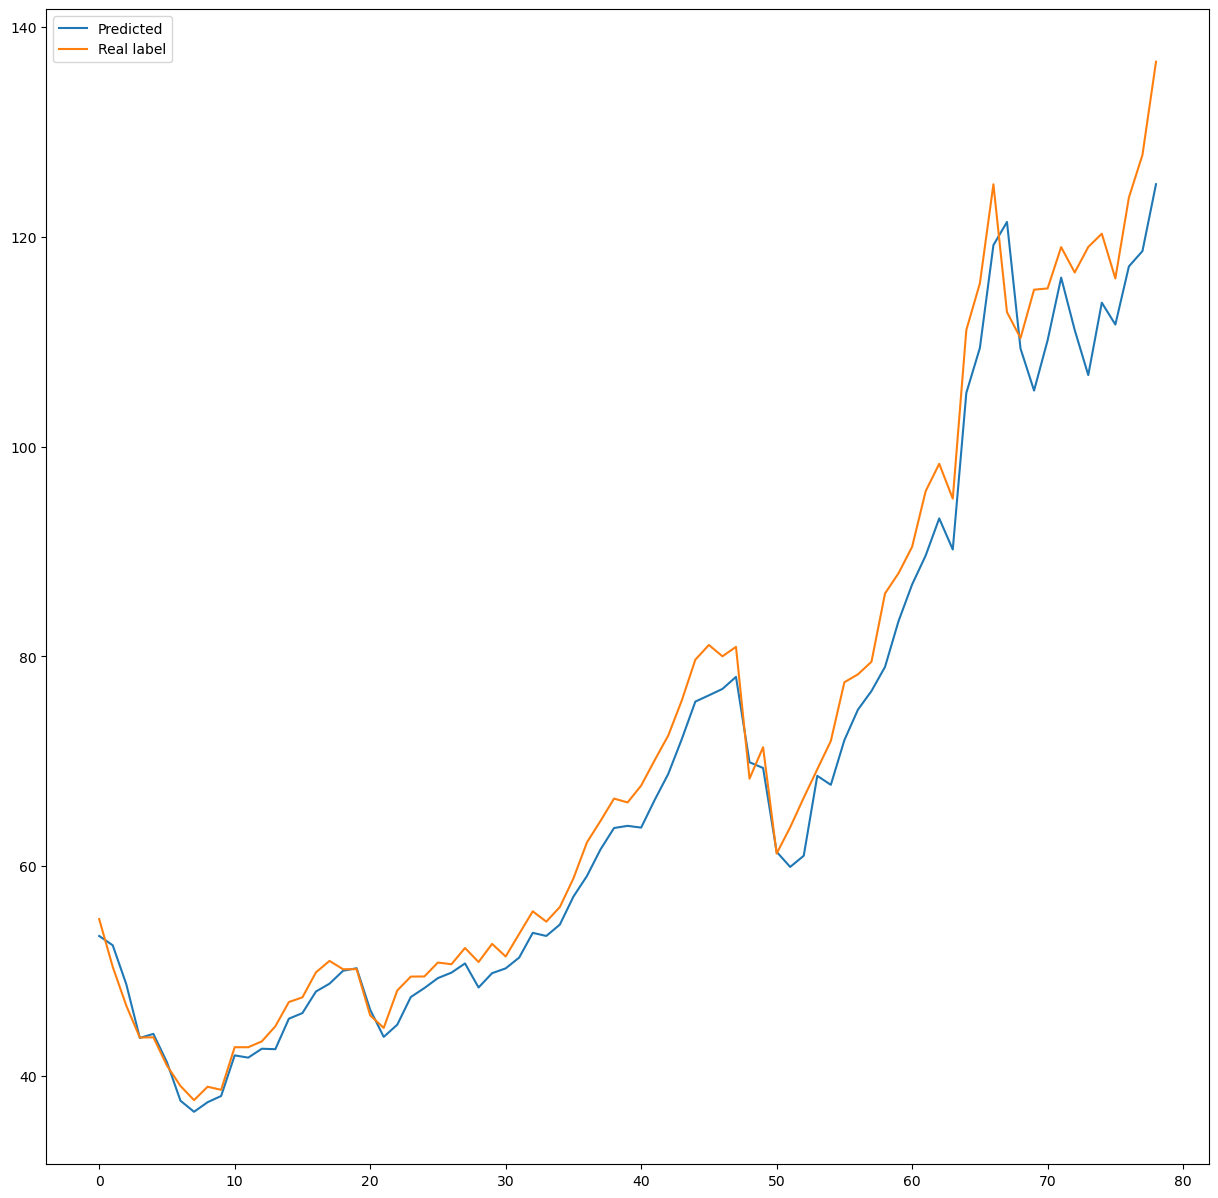

In [23]:
trainScore=0
testScore=0

#calculate root mean squared error
for i in range (trainY.shape[0]):
    trainScore += math.sqrt(mean_squared_error(trainY[i], trainPredict[i]))
trainScore=trainScore/trainY.shape[0]

for i in range (testY.shape[0]):
    testScore += math.sqrt(mean_squared_error(testY[i],testPredict[i]))
testScore=testScore/testY.shape[0]

#MSE score
print('Average Training Difference: %.2f ' % (trainScore))
print('Average Testing Difference: %.2f ' % (testScore))

#Draw prediction and comparing with real labels
plt.figure(figsize=(15,15))
plt.plot(testPredict, label = 'Predicted')
plt.plot(testY, label = 'Real label')
plt.legend()
plt.show()

In [24]:
#Examaple:
a = np.array([[900],[910],[911],[1102],[1156],[1129],[1160]])
#7 ngày

a = scaler.fit_transform(a[:])
a = np.reshape(a,(1,7,1))
aP = model.predict(a)

# invert predictions
aP = scaler.inverse_transform(aP)
print("Predicted: ", aP)

1/1 [==============================] - 0s 20ms/step
Predicted:  [[1084.0708]]


In [25]:
print(testPredict)

[[ 53.340927]
 [ 52.4516  ]
 [ 48.737885]
 [ 43.617863]
 [ 44.006016]
 [ 41.306633]
 [ 37.63327 ]
 [ 36.57844 ]
 [ 37.488564]
 [ 38.0834  ]
 [ 41.95571 ]
 [ 41.74025 ]
 [ 42.588314]
 [ 42.54624 ]
 [ 45.451996]
 [ 45.98836 ]
 [ 48.047035]
 [ 48.79369 ]
 [ 50.021965]
 [ 50.265293]
 [ 46.312412]
 [ 43.717815]
 [ 44.87996 ]
 [ 47.520947]
 [ 48.37179 ]
 [ 49.325607]
 [ 49.844265]
 [ 50.721413]
 [ 48.42775 ]
 [ 49.79456 ]
 [ 50.24865 ]
 [ 51.283268]
 [ 53.638824]
 [ 53.34198 ]
 [ 54.424744]
 [ 57.08939 ]
 [ 59.05983 ]
 [ 61.59084 ]
 [ 63.633965]
 [ 63.83971 ]
 [ 63.672455]
 [ 66.311485]
 [ 68.78707 ]
 [ 72.10796 ]
 [ 75.68588 ]
 [ 76.28413 ]
 [ 76.89509 ]
 [ 78.04393 ]
 [ 69.903244]
 [ 69.35703 ]
 [ 61.36317 ]
 [ 59.92472 ]
 [ 60.988506]
 [ 68.61051 ]
 [ 67.749176]
 [ 72.01202 ]
 [ 74.91508 ]
 [ 76.69446 ]
 [ 78.99701 ]
 [ 83.37074 ]
 [ 86.85284 ]
 [ 89.61316 ]
 [ 93.1532  ]
 [ 90.18752 ]
 [105.11499 ]
 [109.40168 ]
 [119.206085]
 [121.41832 ]
 [109.34514 ]
 [105.34193 ]
 [110.13648 ]
 [116.

In [26]:
print(len(X))

395


In [27]:
a = np.arange(0,79)
a = np.asarray(a, dtype=np.int64).reshape((-1,1))
b = testY
print(b.shape)
a = np.concatenate((a,b), axis=1)
a = np.concatenate((a,testPredict), axis=1)
myresult = pd.DataFrame(a, columns=["Week", "Price","Prediction Price"])

(79, 1)


In [28]:
myresult

,Week,Price,Prediction Price
0,0.0,54.950001,53.340927
1,1.0,50.397499,52.451599
2,2.0,46.700001,48.737885
3,3.0,43.654999,43.617863
4,4.0,43.680000,44.006016
...,...,...,...
74,74.0,120.300003,113.721848
75,75.0,116.029999,111.635147
76,76.0,123.750000,117.179146
77,77.0,127.809998,118.642189


In [29]:
# Saving result
myresult.to_csv("APPLPrediction.csv", index=False)

13/13 [==============================] - 0s 2ms/step
395
Average All dataset Difference: 2.11 


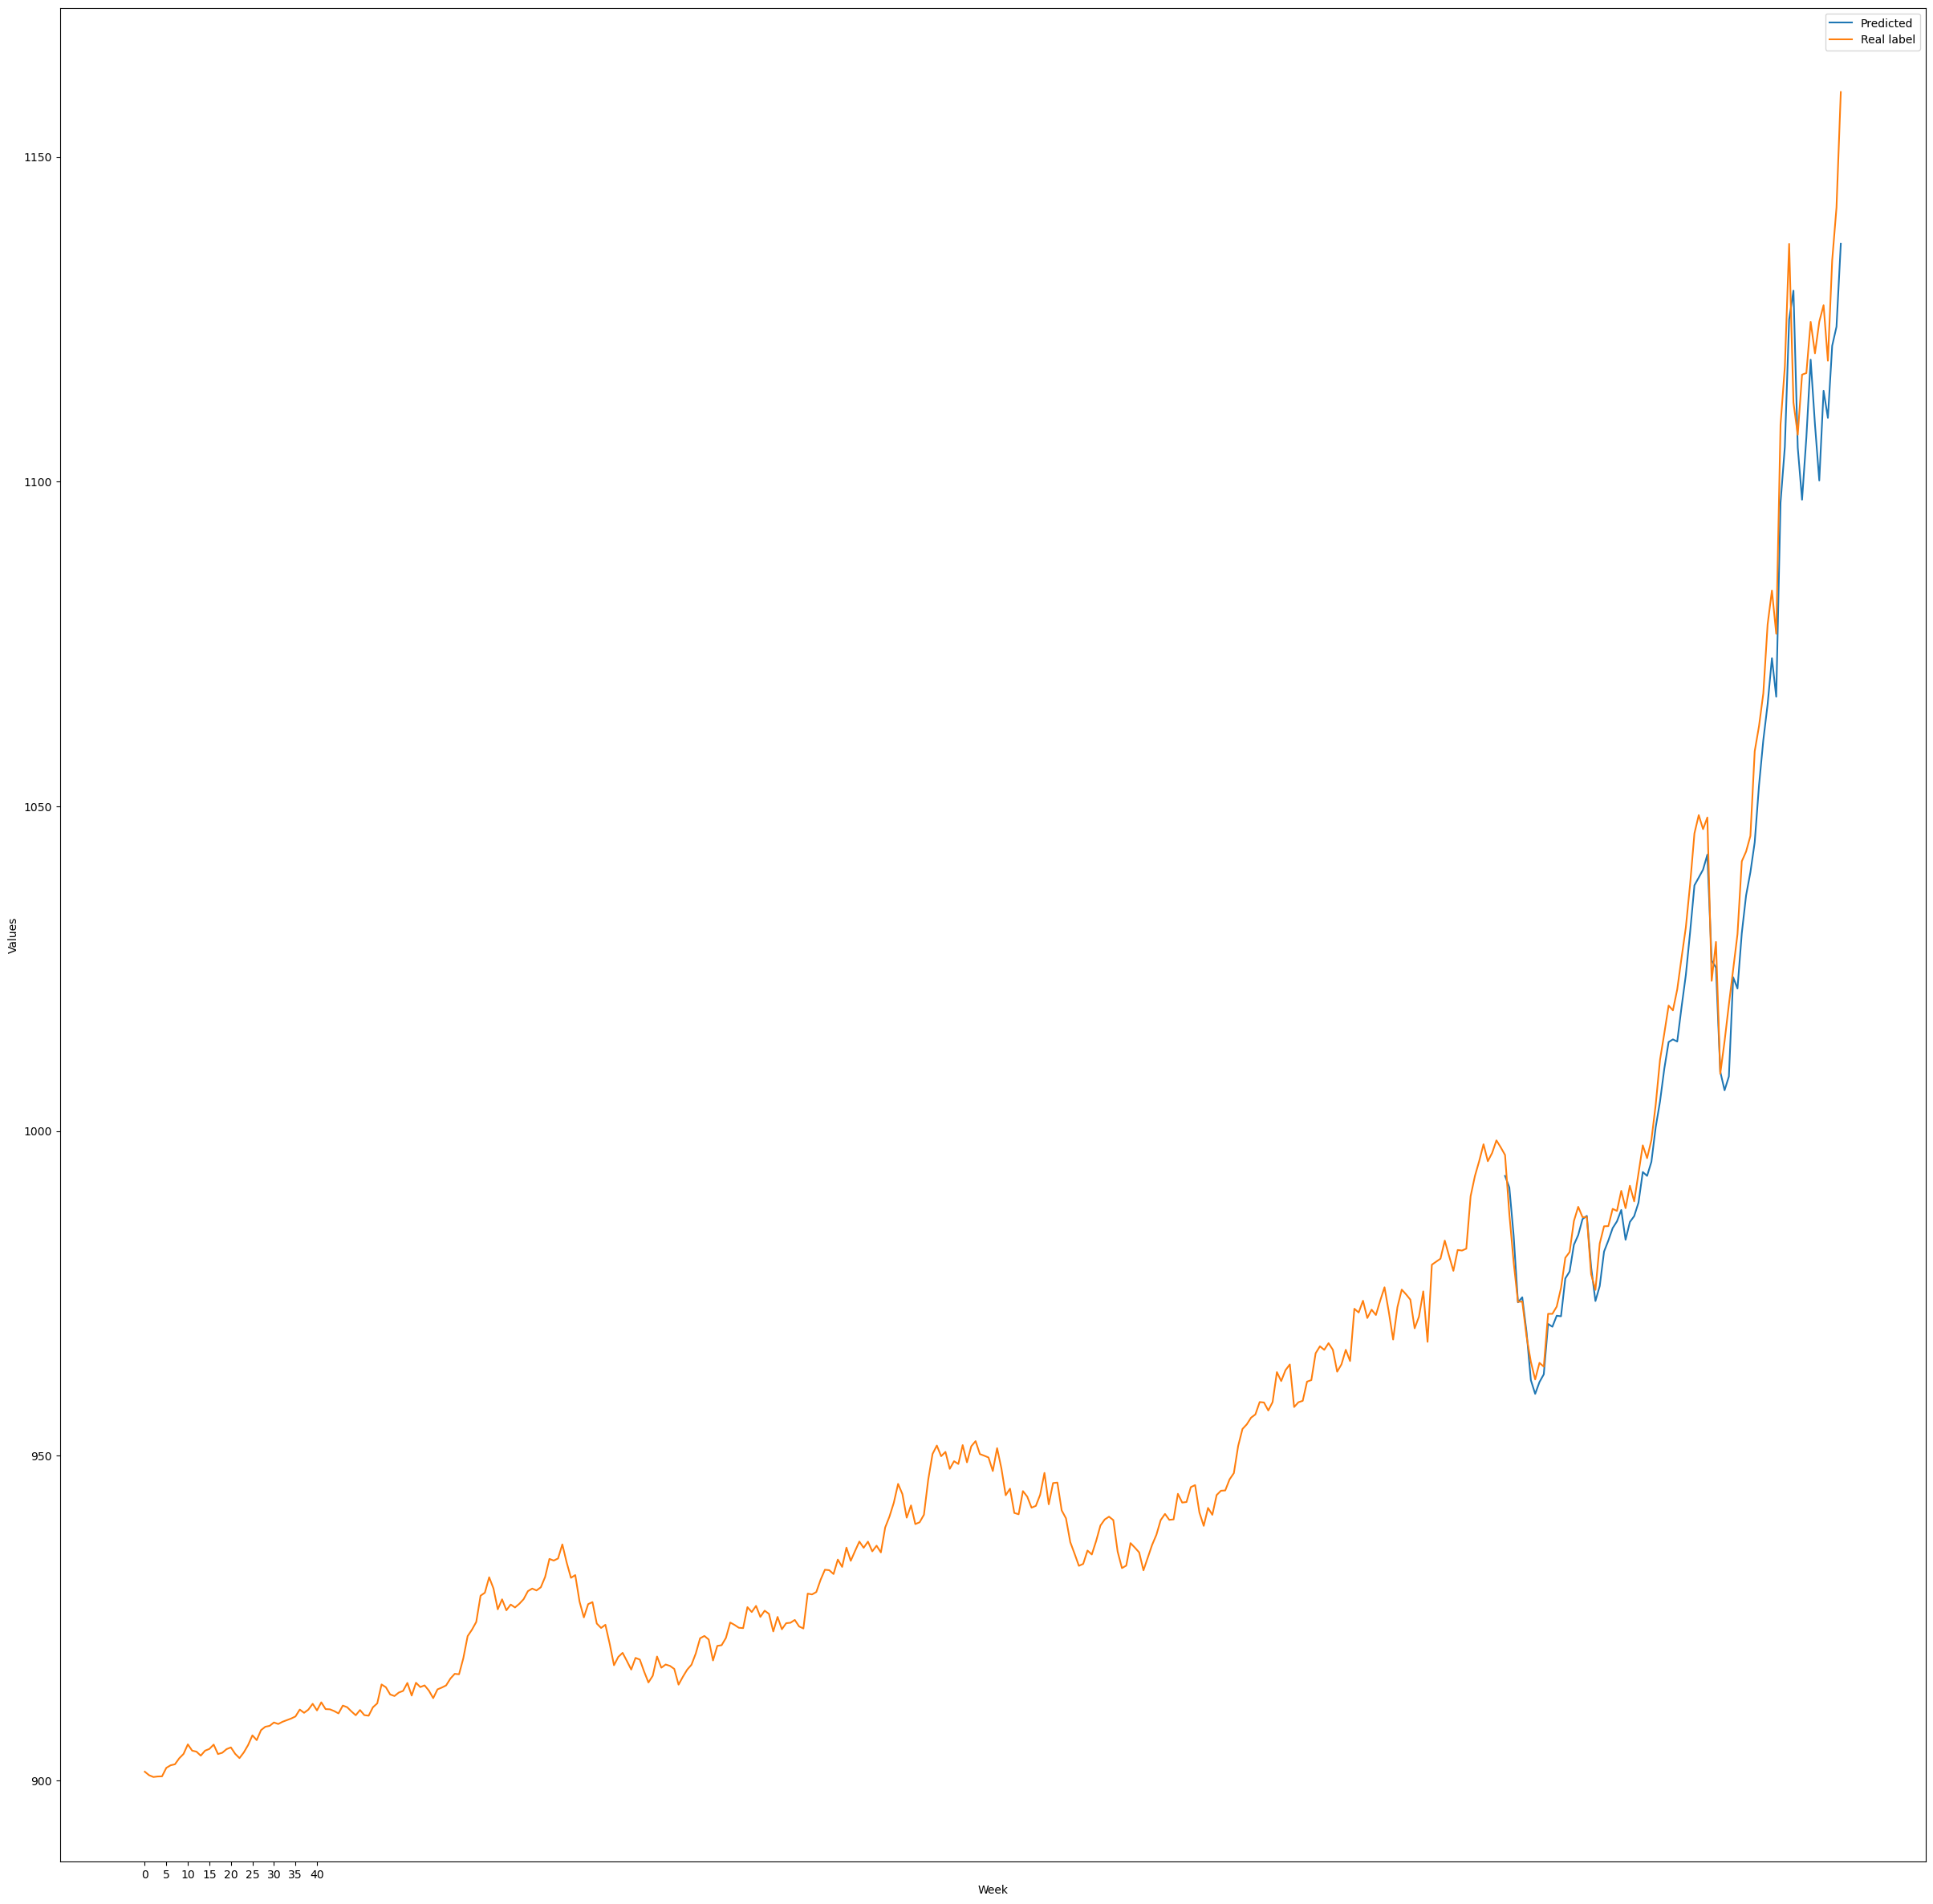

In [30]:
import math
from sklearn.metrics import mean_squared_error

#make predictions for all
allPredict = model.predict(X)
print(len(allPredict))
#invert predictions
allPredict = scaler.inverse_transform(allPredict)
allY = scaler.inverse_transform(Y)

#calculate root mean squared error for all dataset
allScore=0
for i in range (Y.shape[0]):
    allScore += math.sqrt(mean_squared_error(allPredict[i], allY[i]))
allScore=allScore/Y.shape[0]

#MSE score(sai số trên tổng thể dữ liệu nha)
print('Average All dataset Difference: %.2f ' % (allScore))

new1 = []
for i in range(316,395):
  new1.append(i)
new1 = np.array(new1)
plt.figure(figsize=(30,30))
plt.plot(new1,allPredict[316:], label = 'Predicted')
plt.plot(allY, label = 'Real label')
plt.xticks(np.arange(0, 45, 5))

plt.ylabel("Values")
plt.xlabel("Week")

plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rms = mean_squared_error(allPredict, allY, squared=False)
mae = mean_absolute_error(allPredict, allY)
print('MSE: ', allScore)
print("RMSE value: ", rms)
print("MAE value: ", mae)

MSE:  2.1080405625044145
RMSE value:  3.910188211242617
MAE value:  2.1080405625044145
